In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv('salary_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_text,job_state,same_state,age,python_yn,R_yn,SparkR_yn,aws_yn,Excel_yn
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,154.0,Healthfirst\r\n,NY,1,27,0,1,0,1,0
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,154.0,ManTech\r\n,VA,0,52,0,1,0,0,0
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,154.0,Analysis Group\r\n,MA,1,39,1,1,0,1,1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON\r\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,154.0,INFICON\r\n,MA,0,20,1,1,0,1,1
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,154.0,Affinity Solutions\r\n,NY,1,22,1,1,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'SparkR_yn', 'aws_yn', 'Excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'leader' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
# Adding simplified positions
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    455
na                 69
analyst            55
data engineer      47
mle                36
manager             7
director            3
Name: job_simp, dtype: int64

In [8]:
# Adding seniority
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        584
senior     86
jr          2
Name: seniority, dtype: int64

In [9]:
# Fix states CA,NJ,TX and UT
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'los angeles' else 'CA')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'california' else 'CA')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'new jersey' else 'NJ')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'texas' else 'TX')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'utah' else 'UT')

In [10]:
# removing the \n from the company titles
df['company_text'] = df['company_text'].apply(lambda x: x.split("\n")[0] if '\n' in x else x)

In [11]:
# To get the length of the job descriptions
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [12]:
df['desc_len']

0      3431
1      4110
2      8844
3      3381
4      2748
       ... 
667    3690
668    1257
669    2830
670    3426
671    3053
Name: desc_len, Length: 672, dtype: int64

In [13]:
# Compeititors Count
df['Competitors']

0                EmblemHealth, UnitedHealth Group, Aetna
1                                                     -1
2                                                     -1
3      MKS Instruments, Pfeiffer Vacuum, Agilent Tech...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
667                                                   -1
668                                                   -1
669                                                   -1
670                                                   -1
671                                                   -1
Name: Competitors, Length: 672, dtype: object

In [14]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!= '-1' else 0)

In [15]:
df.avg_salary.value_counts()

107.0    43
92.5     43
114.0    41
106.0    39
103.0    32
105.0    32
115.5    32
154.0    30
99.5     30
76.5     22
134.0    21
271.5    21
133.0    21
164.5    21
123.5    21
120.5    21
161.0    21
136.5    21
148.0    21
43.5     20
89.0     20
136.0    20
185.0    20
113.0    20
183.0    20
97.0     19
Name: avg_salary, dtype: int64

In [16]:
df.drop(['hourly'],inplace = True,axis = 1)

In [17]:
df.employer_provided.value_counts()

0    672
Name: employer_provided, dtype: int64

In [18]:
df.drop(['employer_provided'],inplace = True, axis=1)

In [19]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,SparkR_yn,aws_yn,Excel_yn,desc_len,num_comp
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.0,672.000000,672.000000,672.000000,672.000000,672.000000
mean,3.518601,1635.529762,99.196429,148.130952,123.663690,0.400298,29.416667,0.730655,1.0,0.281250,0.258929,0.440476,3520.602679,0.700893
std,1.410329,756.746640,33.009958,48.035110,39.580268,0.490324,39.489577,0.443950,0.0,0.449944,0.438373,0.496814,1638.772636,1.227407
min,-1.000000,-1.000000,31.000000,56.000000,43.500000,0.000000,-1.000000,0.000000,1.0,0.000000,0.000000,0.000000,73.000000,0.000000
25%,3.300000,1917.750000,79.000000,119.000000,103.000000,0.000000,5.000000,0.000000,1.0,0.000000,0.000000,0.000000,2435.500000,0.000000
50%,3.800000,1995.000000,91.000000,133.000000,114.000000,0.000000,16.000000,1.000000,1.0,0.000000,0.000000,0.000000,3391.500000,0.000000
75%,4.300000,2009.000000,122.000000,165.000000,136.500000,1.000000,37.000000,1.000000,1.0,1.000000,1.000000,1.000000,4343.000000,1.000000
max,5.000000,2019.000000,212.000000,331.000000,271.500000,1.000000,239.000000,1.000000,1.0,1.000000,1.000000,1.000000,10681.000000,3.000000


In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

<AxesSubplot:>

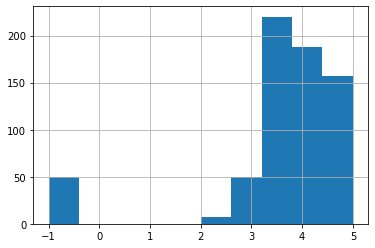

In [21]:
df.Rating.hist()

<AxesSubplot:>

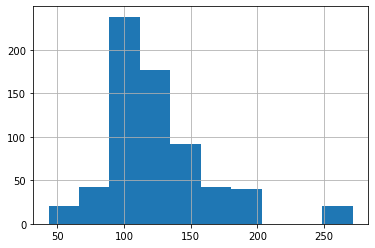

In [22]:
df.avg_salary.hist()

<AxesSubplot:>

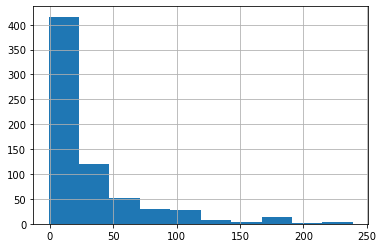

In [23]:
df.age.hist()

<AxesSubplot:>

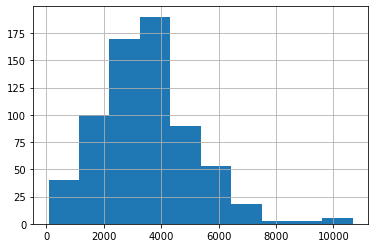

In [24]:
df.desc_len.hist()

<AxesSubplot:>

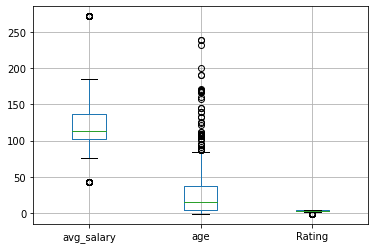

In [25]:
df.boxplot(['avg_salary','age','Rating'])

<AxesSubplot:>

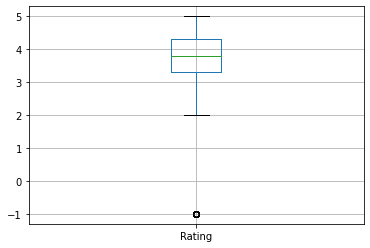

In [26]:
df.boxplot(['Rating'])

In [27]:
df[['avg_salary','age','Rating','desc_len']].corr()

,avg_salary,age,Rating,desc_len
avg_salary,1.000000,-0.044211,-0.071066,0.002929
age,-0.044211,1.000000,0.123288,0.248343
Rating,-0.071066,0.123288,1.000000,-0.010636
desc_len,0.002929,0.248343,-0.010636,1.000000


<AxesSubplot:>

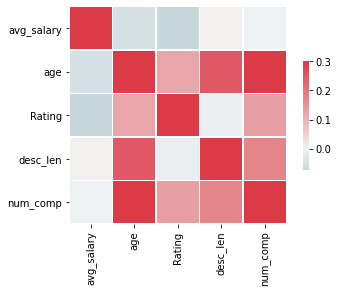

In [28]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['avg_salary','age','Rating','desc_len','num_comp']].corr(),cmap=cmap,vmax =.3,center =0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [30]:
df_cat=df[['Location','Headquarters','Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_text','job_state','same_state','python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn', 'job_simp', 'seniority']]

Graph for Location: Total = 207


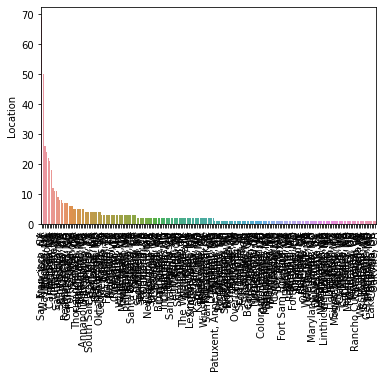

Graph for Headquarters: Total = 229


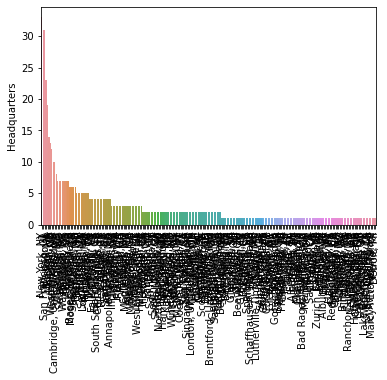

Graph for Size: Total = 9


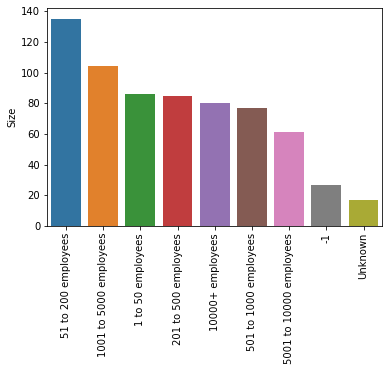

Graph for Type of ownership: Total = 13


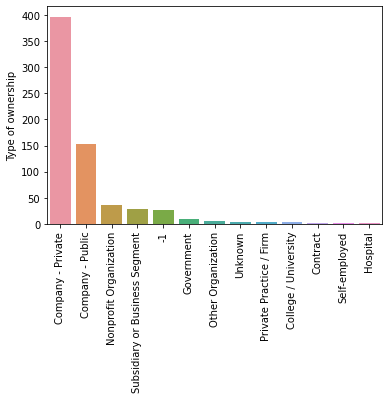

Graph for Industry: Total = 58


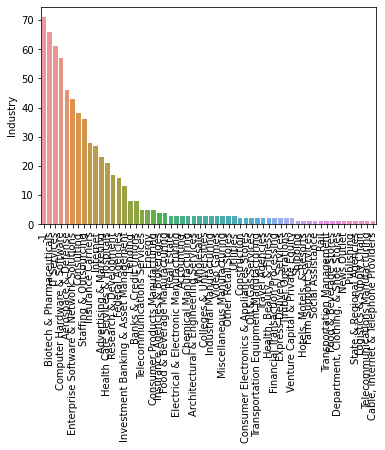

Graph for Sector: Total = 23


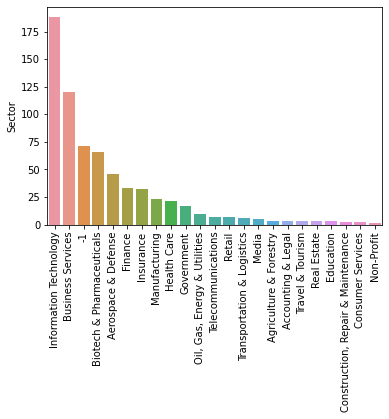

Graph for Revenue: Total = 14


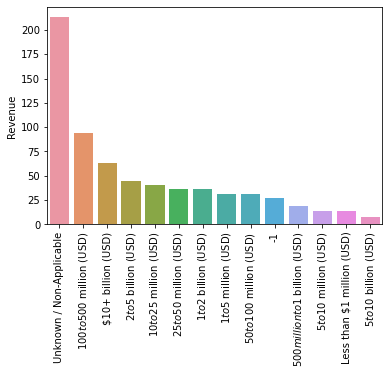

Graph for company_text: Total = 432


C:\Users\adity\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\adity\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


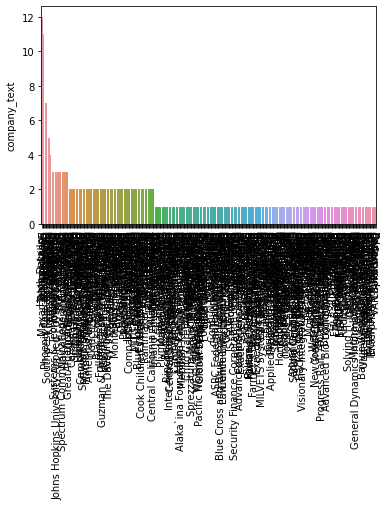

Graph for job_state: Total = 40


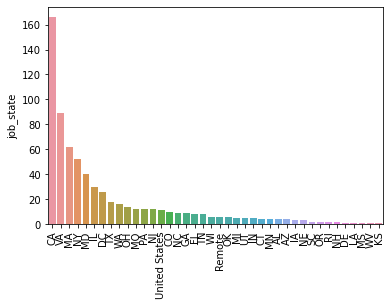

Graph for same_state: Total = 2


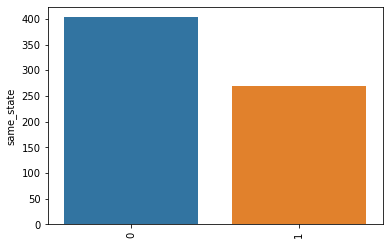

Graph for python_yn: Total = 2


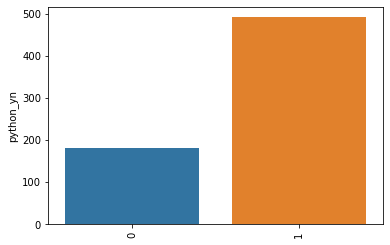

Graph for R_yn: Total = 1


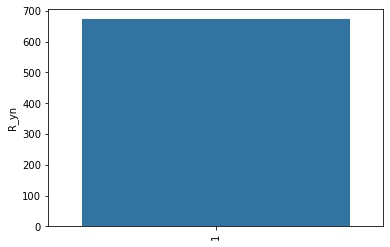

Graph for SparkR_yn: Total = 2


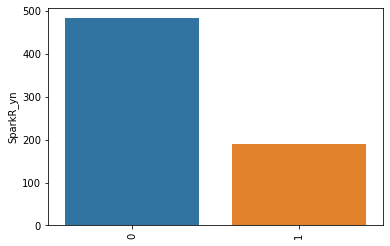

Graph for aws_yn: Total = 2


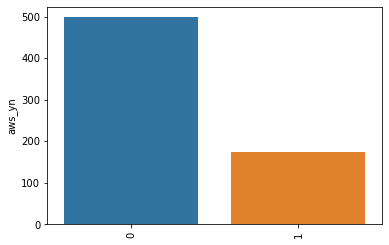

Graph for Excel_yn: Total = 2


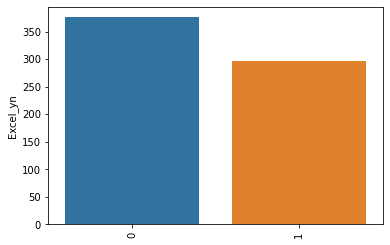

Graph for job_simp: Total = 7


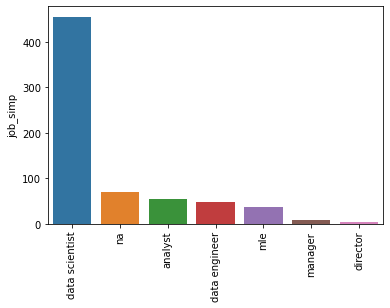

Graph for seniority: Total = 3


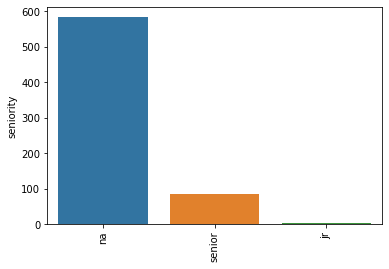

In [31]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: Total = %d" % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: Total = 20


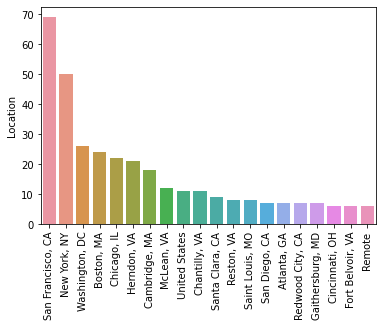

Graph for Headquarters: Total = 20


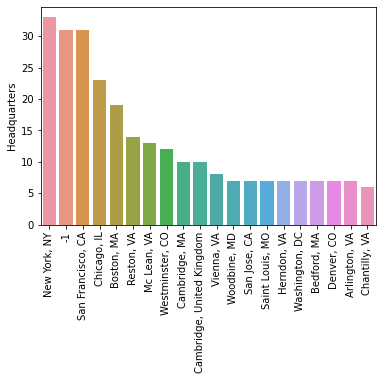

Graph for Industry: Total = 20


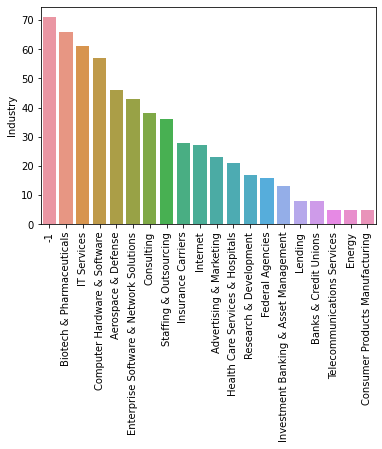

Graph for company_text: Total = 20


C:\Users\adity\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\adity\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


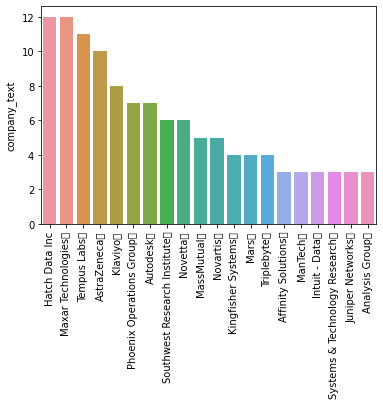

In [32]:
 for i in df_cat[['Location','Headquarters','Industry','company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: Total = %d" % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [34]:
pd.pivot_table(df,index='job_simp',values = 'avg_salary')

,avg_salary
job_simp,
analyst,115.718182
data engineer,113.808511
data scientist,125.216484
director,127.333333
manager,138.214286
mle,117.236111
na,128.188406


In [35]:
pd.pivot_table(df,index=['job_simp','seniority'],values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          76.500000
               na         116.297297
               senior     116.764706
data engineer  jr         103.000000
               na         114.475000
               senior     111.166667
data scientist na         125.564951
               senior     122.191489
director       na         120.500000
               senior     130.750000
manager        na         138.214286
mle            na         114.000000
               senior     126.944444
na             na         128.125000
               senior     129.000000

In [36]:
pd.pivot_table(df,index='job_state',values = 'avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
DE,271.500000
NC,150.111111
WI,144.416667
AZ,140.875000
IA,140.833333
DC,139.500000
NY,136.432692
WA,134.781250
TX,133.888889


In [37]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [38]:
pd.pivot_table(df,index=['job_state','job_simp'],values = 'avg_salary',aggfunc='count').sort_values('job_state')

avg_salary
job_state     job_simp                  
AL            data engineer            1
              data scientist           1
              na                       2
AZ            data engineer            1
              data scientist           2
              na                       1
CA            analyst                 12
              data engineer           15
              data scientist         118
              manager                  4
              mle                      9
              na                       8
CO            mle                      1
              data scientist           9
CT            data engineer            2
              data scientist           2
DC            analyst                  1
              data scientist          25
DE            data scientist           1
FL            data engineer            4
              data scientist           2
              na                       2
GA            data scientist           9
IA            analyst                  3
IL            na                       3
              data scientist          19
              mle                      3
              analyst                  3
              data engineer            2
IN            analyst                  2
              data engineer            1
              data scientist           1
              na                       1
KS            data scientist           1
LA            analyst                  1
MA            mle                      3
              analyst                  1
              data scientist          37
              director                 1
              manager                  1
              na                      19
MD            na                       8
              data scientist          27
              analyst                  2
              data engineer            3
MI            data scientist           4
              manager                  1
MN            analyst                  3
              data scientist           1
MO            data scientist           9
              analyst                  1
              data engineer            2
MS            na                       1
NC            mle                      2
              na                       3
              manager                  1
              data scientist           1
              data engineer            1
              analyst                  1
NE            analyst                  1
              data scientist           2
NH            data scientist           1
              mle                      1
NJ            analyst                  1
              data scientist          10
              na                       1
NY            analyst                  1
              data engineer            4
              data scientist          41
              mle                      3
              na                       3
OH            na                       2
              mle                      1
              data engineer            2
              data scientist           9
OK            analyst                  2
              na                       4
OR            data scientist           1
              mle                      1
PA            analyst                  4
              data scientist           5
              mle                      2
              na                       1
RI            director                 2
Remote        na                       1
              mle                      2
              data engineer            1
              data scientist           2
SC            analyst                  1
              na                       1
TN            analyst                  2
              data scientist           5
              mle                      1
TX            analyst                  3
              data scientist          13
              na                       2
UT          

In [39]:
pd.pivot_table(df[df.job_simp=='data scientist'],index='job_state',values = 'avg_salary').sort_values('avg_salary',ascending = False) 

,avg_salary
job_state,
DE,271.500000
NH,161.000000
AZ,147.000000
WI,144.000000
NY,141.707317
DC,139.760000
PA,136.800000
NC,136.000000
TX,135.192308


In [40]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [41]:
df_pivots = df[['Rating','Industry','Sector','Revenue','num_comp','python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn','Type of ownership','avg_salary']]

In [43]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i,values = 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
 2.0    148.000000
 2.7    145.200000
-1.0    134.660000
 2.3    133.000000
 3.5    131.051724
 3.4    130.387097
 4.5    129.421875
 3.8    127.538462
 3.6    126.854839
 4.1    126.360000
 4.2    125.827586
 3.2    124.333333
 4.6    124.000000
 3.9    123.725000
 4.4    122.229167
 4.8    121.550000
 5.0    121.041667
 4.7    120.772727
 4.0    120.097561
 3.3    119.731707
 4.3    117.285714
 3.1    115.708333
 2.5    114.250000
 3.7    110.552632
 4.9    108.272727
 3.0    107.071429
 2.1    106.000000
 2.8    103.833333
 2.6    103.375000
 2.9    103.071429
 2.2    103.000000
 2.4     99.500000
Industry
                                          avg_salary
Industry                                            
Publishing                                271.500000
Health, Beauty, & Fitness                 203.750000
State & Regional Agencies                 183.000000
Hotels, Motels, & Resorts                 183.000000
Food & Beverage Stor

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [44]:
pd.pivot_table(df_pivots,index = 'Revenue',columns = 'python_yn',values = 'avg_salary')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),110.200000,131.596154
$1 to $5 million (USD),173.000000,117.775862
$10 to $25 million (USD),114.954545,125.683333
$10+ billion (USD),124.250000,119.644444
$100 to $500 million (USD),121.112903,122.031746
$2 to $5 billion (USD),112.571429,131.725806
$25 to $50 million (USD),96.562500,129.178571
$5 to $10 billion (USD),137.000000,137.375000
$5 to $10 million (USD),129.333333,132.000000


In [45]:
pd.pivot_table(df_pivots,index = 'Revenue',columns = 'python_yn',values = 'avg_salary',aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),10.0,26.0
$1 to $5 million (USD),2.0,29.0
$10 to $25 million (USD),11.0,30.0
$10+ billion (USD),18.0,45.0
$100 to $500 million (USD),31.0,63.0
$2 to $5 billion (USD),14.0,31.0
$25 to $50 million (USD),8.0,28.0
$5 to $10 billion (USD),4.0,4.0
$5 to $10 million (USD),3.0,11.0


In [46]:
# Generate a Word Cloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import  nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

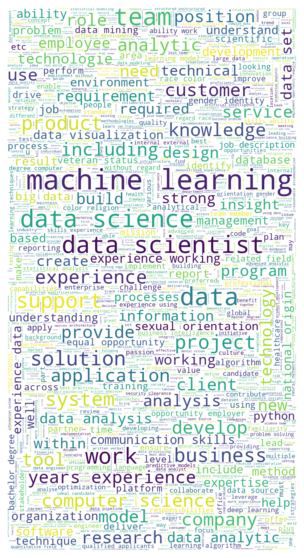

In [47]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

word_filtered = punctuation_stop(words)

text = " ".join([ele for ele in word_filtered])

wc = WordCloud(background_color="white",random_state=1,stopwords=STOPWORDS,max_words=2000,width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,SparkR_yn,aws_yn,Excel_yn,job_simp,seniority,desc_len,num_comp
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,27,0,1,0,1,0,data scientist,senior,3431,3
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,52,0,1,0,0,0,data scientist,na,4110,0
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,39,1,1,0,1,1,data scientist,na,8844,0
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON\r\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,20,1,1,0,1,1,data scientist,na,3381,3
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,1,0,0,1,data scientist,na,2748,3
5,Data Scientist,$137K-$171K (Glassdoor est.),About Us:\r\n\r\nHeadquartered in beautiful Sa...,4.2,HG Insights\r\n4.2,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,...,10,1,1,1,0,1,data scientist,na,3782,0
6,Data Scientist / Machine Learning Expert,$137K-$171K (Glassdoor est.),Posting Title\r\nData Scientist / Machine Lear...,3.9,Novartis\r\n3.9,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,...,24,1,1,0,0,0,data scientist,na,5126,0
7,Data Scientist,$137K-$171K (Glassdoor est.),Introduction\r\n\r\nHave you always wanted to ...,3.5,iRobot\r\n3.5,"Bedford, MA","Bedford, MA",1001 to 5000 employees,1990,Company - Public,...,30,1,1,0,0,0,data scientist,na,1756,0
8,Staff Data Scientist - Analytics,$137K-$171K (Glassdoor est.),Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data\r\n4.4,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,1983,Company - Public,...,37,0,1,0,0,0,data scientist,na,456,3
9,Data Scientist,$137K-$171K (Glassdoor est.),Ready to write the best chapter of your career...,3.6,XSELL Technologies\r\n3.6,"Chicago, IL","Chicago, IL",51 to 200 employees,2014,Company - Private,...,6,1,1,0,0,0,data scientist,na,3512,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             672 non-null    float64
 4   Company Name       672 non-null    object 
 5   Location           672 non-null    object 
 6   Headquarters       672 non-null    object 
 7   Size               672 non-null    object 
 8   Founded            672 non-null    int64  
 9   Type of ownership  672 non-null    object 
 10  Industry           672 non-null    object 
 11  Sector             672 non-null    object 
 12  Revenue            672 non-null    object 
 13  Competitors        672 non-null    object 
 14  min_salary         672 non-null    int64  
 15  max_salary         672 non-null    int64  
 16  avg_salary         672 non

In [50]:
df.to_csv('edu_data.csv')